In [2]:
from pyqubo import Array, Constraint, Placeholder
import networkx as nx
import itertools 
import neal
import matplotlib.pyplot as plt
import numpy as np

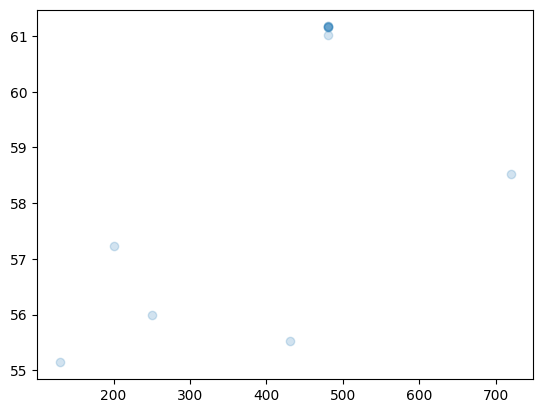

In [166]:
x=np.array([720,201,480,480,481,431,480,480,130,250,481])
y=np.array([58.51519,57.2276,61.1719,61.17199,61.02159,55.5212,61.171,61.171,55.14,56.0,61.171])
plt.scatter(x,y,alpha=.2)
plt.show()

In [3]:
import csv

# 读取 CSV 文件
data = []
with open('data_100.csv') as file:
    reader = csv.reader(file)
    header = next(reader) # 读取文件头，偶数列即为需要的列
    even_cols = header[::2] # 获取偶数列的列名列表
    column_data = {col: [] for col in even_cols} # 初始化每一列的列表
    for row in reader:
        for i, col in enumerate(row):
            if header[i] in even_cols: # 只处理偶数列的数据
                column_data[header[i]].append(col)

# 将每一列的数据组成一个10个数的列表，存储到一维列表中
for col in even_cols:
    column_list = column_data[col]
    column_list_10 = [column_list[i:i+10] for i in range(0, len(column_list), 10)]
    flattened_list = [item for sublist in column_list_10 for item in sublist]
    data.append(flattened_list)
t=data


for i in range(len(t)):
    for j in range(len(t[i])):
        t[i][j] = float(t[i][j])
        
t = [value for row in t for value in row]
print(t)



[0.76, 0.77, 0.78, 0.8, 0.82, 0.84, 0.87, 0.93, 0.94, 0.96, 0.72, 0.73, 0.76, 0.77, 0.79, 0.82, 0.86, 0.87, 0.91, 0.92, 0.8, 0.82, 0.83, 0.86, 0.89, 0.92, 0.93, 0.94, 0.97, 0.98, 0.79, 0.8, 0.81, 0.84, 0.85, 0.87, 0.88, 0.9, 0.92, 0.93, 0.7, 0.76, 0.77, 0.79, 0.81, 0.83, 0.87, 0.88, 0.91, 0.94, 0.7, 0.71, 0.73, 0.82, 0.83, 0.89, 0.9, 0.91, 0.92, 0.94, 0.73, 0.74, 0.75, 0.78, 0.79, 0.84, 0.87, 0.9, 0.91, 0.95, 0.79, 0.88, 0.89, 0.9, 0.93, 0.94, 0.96, 0.97, 0.98, 0.99, 0.75, 0.76, 0.78, 0.84, 0.85, 0.87, 0.88, 0.89, 0.93, 0.96, 0.73, 0.74, 0.76, 0.77, 0.8, 0.82, 0.87, 0.88, 0.89, 0.9, 0.75, 0.78, 0.82, 0.83, 0.86, 0.88, 0.92, 0.94, 0.96, 0.97, 0.71, 0.72, 0.77, 0.78, 0.82, 0.86, 0.88, 0.9, 0.91, 0.93, 0.8, 0.82, 0.84, 0.88, 0.9, 0.92, 0.93, 0.95, 0.96, 0.99, 0.75, 0.76, 0.77, 0.82, 0.84, 0.85, 0.88, 0.92, 0.93, 0.95, 0.72, 0.74, 0.78, 0.79, 0.82, 0.86, 0.9, 0.92, 0.93, 0.94, 0.71, 0.78, 0.8, 0.84, 0.86, 0.87, 0.9, 0.91, 0.94, 0.97, 0.72, 0.73, 0.76, 0.77, 0.82, 0.83, 0.84, 0.88, 0.91, 0.

In [53]:
int(t[0][0])

76

In [4]:
import csv

# 读取 CSV 文件
data = []
with open('data_100.csv') as file:
    reader = csv.reader(file)
    header = next(reader) # 读取文件头，奇数列即为需要的列
    odd_cols = header[1::2] # 获取奇数列的列名列表
    column_data = {col: [] for col in odd_cols} # 初始化每一列的列表
    for row in reader:
        for i, col in enumerate(row):
            if header[i] in odd_cols: # 只处理奇数列的数据
                column_data[header[i]].append(col)

# 将每一列的数据组成一个10个数的列表，存储到一维列表中
for col in odd_cols:
    column_list = column_data[col]
    column_list_10 = [column_list[i:i+10] for i in range(0, len(column_list), 10)]
    flattened_list = [item for sublist in column_list_10 for item in sublist]
    data.append(flattened_list)
h=data
for i in range(len(h)):
    for j in range(len(h[i])):
        h[i][j] = float(h[i][j])
    
h = [value for row in h for value in row]
print(h)


[0.013, 0.015, 0.017, 0.024, 0.026, 0.028, 0.03, 0.036, 0.043, 0.052, 0.032, 0.038, 0.05, 0.053, 0.065, 0.074, 0.076, 0.079, 0.08, 0.084, 0.012, 0.013, 0.024, 0.04, 0.042, 0.057, 0.068, 0.069, 0.07, 0.073, 0.004, 0.007, 0.011, 0.017, 0.028, 0.04, 0.046, 0.051, 0.052, 0.059, 0.009, 0.015, 0.025, 0.03, 0.035, 0.042, 0.047, 0.055, 0.066, 0.071, 0.033, 0.037, 0.042, 0.045, 0.058, 0.064, 0.072, 0.074, 0.075, 0.077, 0.016, 0.021, 0.022, 0.032, 0.047, 0.05, 0.058, 0.067, 0.078, 0.079, 0.01, 0.013, 0.016, 0.017, 0.032, 0.036, 0.039, 0.047, 0.069, 0.07, 0.01, 0.011, 0.015, 0.021, 0.026, 0.032, 0.041, 0.046, 0.048, 0.051, 0.012, 0.018, 0.019, 0.025, 0.04, 0.052, 0.055, 0.057, 0.059, 0.063, 0.007, 0.011, 0.023, 0.028, 0.03, 0.033, 0.037, 0.045, 0.049, 0.05, 0.012, 0.028, 0.029, 0.038, 0.039, 0.058, 0.063, 0.068, 0.07, 0.087, 0.012, 0.023, 0.03, 0.034, 0.035, 0.037, 0.056, 0.06, 0.064, 0.077, 0.006, 0.007, 0.014, 0.024, 0.028, 0.033, 0.034, 0.035, 0.042, 0.053, 0.027, 0.031, 0.032, 0.04, 0.043, 0.

In [21]:
t = 1-x[0]+t[0]*x[0]
for i in range(1,30):
    t *= 1-x[i]+t[i]*x[i]
t

TypeError: 'cpp_pyqubo.Add' object is not subscriptable

In [16]:
import numpy as np
from pyqubo import Array, Constraint, solve_qubo

# 定义二进制变量 x
x = Array.create("x", shape=1000, vartype="BINARY")

# 定义原始目标函数
f = sum(t[i] * (10 - 135 * h[i]) * x[i] for i in range(100))

# 定义约束条件
constraint = Constraint((sum(x[i] for i in range(100)) - 1) ** 2, label="constraint")
# 定义拉格朗日乘数
lagrange_multiplier = 5
# 定义带有约束的目标函数
g = -f + lagrange_multiplier * constraint
# 编译目标函数，生成QUBO
compiled_qubo = g.compile()
# 解决QUBO问题
qubo, offset = compiled_qubo.to_qubo()
solution = solve_qubo(qubo)

print(get_key_by_value(solution,1))



x[30]


/var/folders/yy/k2lrbz7134lgq6pb5lpjt3040000gn/T/ipykernel_22193/3223420227.py:20: DeprecationWarning: Call to deprecated function (or staticmethod) solve_qubo. (You should use simulated annealing sampler of dwave-neal directly.) -- Deprecated since version 0.4.0.
  solution = solve_qubo(qubo)


In [174]:
offset

5.0

dict

In [87]:
best_sample.sample

{'x[999]': 0,
 'x[995]': 0,
 'x[994]': 0,
 'x[992]': 0,
 'x[991]': 0,
 'x[990]': 0,
 'x[989]': 0,
 'x[986]': 0,
 'x[983]': 0,
 'x[981]': 0,
 'x[980]': 0,
 'x[97]': 0,
 'x[978]': 0,
 'x[976]': 0,
 'x[974]': 0,
 'x[982]': 0,
 'x[973]': 0,
 'x[969]': 0,
 'x[968]': 0,
 'x[967]': 0,
 'x[966]': 0,
 'x[965]': 0,
 'x[964]': 0,
 'x[963]': 0,
 'x[961]': 0,
 'x[95]': 0,
 'x[959]': 0,
 'x[958]': 0,
 'x[957]': 0,
 'x[955]': 0,
 'x[954]': 0,
 'x[953]': 0,
 'x[94]': 0,
 'x[947]': 0,
 'x[946]': 0,
 'x[944]': 0,
 'x[940]': 0,
 'x[977]': 0,
 'x[93]': 0,
 'x[938]': 0,
 'x[934]': 0,
 'x[933]': 0,
 'x[932]': 0,
 'x[931]': 0,
 'x[979]': 0,
 'x[930]': 0,
 'x[928]': 0,
 'x[927]': 0,
 'x[926]': 0,
 'x[923]': 0,
 'x[922]': 0,
 'x[921]': 0,
 'x[91]': 0,
 'x[919]': 0,
 'x[917]': 0,
 'x[916]': 0,
 'x[915]': 0,
 'x[914]': 0,
 'x[912]': 0,
 'x[910]': 0,
 'x[908]': 0,
 'x[962]': 0,
 'x[905]': 0,
 'x[904]': 0,
 'x[903]': 0,
 'x[902]': 0,
 'x[901]': 0,
 'x[899]': 0,
 'x[897]': 0,
 'x[896]': 0,
 'x[894]': 0,
 'x[891]': 

In [59]:
a

135.0

In [9]:
def get_key_by_value(d, target_value):
    for key, value in d.items():
        if value == target_value:
            return key
    return "Value not found in the dictionary"
get_key_by_value(solution,1)

'x[0]'